### Final Project
Data 311
<br>Cindy Pham, Isabel Rodriguez and Lyric Otto

In [144]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("openpowerlifting.csv",index_col=[0],low_memory=False)

In [145]:
df

Sex Event Equipment   Age AgeClass   Division  \
Name                                                               
Abbie Murphy         F   SBD     Wraps  29.0    24-34       F-OR   
Abbie Tuong          F   SBD     Wraps  29.0    24-34       F-OR   
Ainslee Hooper       F     B       Raw  40.0    40-44       F-OR   
Amy Moldenhauer      F   SBD     Wraps  23.0    20-23       F-OR   
Andrea Rowan         F   SBD     Wraps  45.0    45-49       F-OR   
...                 ..   ...       ...   ...      ...        ...   
Marian Cafalik       M   SBD       Raw  60.5    60-64  Masters 2   
Marian Piwowarczyk   M   SBD       Raw  55.5    55-59  Masters 2   
Andrzej Bryniarski   M   SBD       Raw  62.5    60-64  Masters 2   
Stanisław Goroczko   M   SBD       Raw  63.5    60-64  Masters 2   
Jan Sowa             M   SBD       Raw  70.5    70-74  Masters 2   

                    BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  ...  \
Name                                                                ...   
Abbie Murphy                59.8            60      80.0      92.5  ...   
Abbie Tuong                 58.5            60     100.0     110.0  ...   
Ainslee Hooper              55.4            56       NaN       NaN  ...   
Amy Moldenhauer             60.0            60    -105.0    -105.0  ...   
Andrea Rowan               104.0           110     120.0     130.0  ...   
...                          ...           ...       ...       ...  ...   
Marian Cafalik              73.5            74     160.0     170.0  ...   
Marian Piwowarczyk          63.5            66      90.0     100.0  ...   
Andrzej Bryniarski          94.4           105     140.0     150.0  ...   
Stanisław Goroczko          80.8            83    -165.0    -165.0  ...   
Jan Sowa                    82.0            83    -115.0     115.0  ...   

                    McCulloch  Glossbrenner  IPFPoints  Tested  Country  \
Name                                                                      
Abbie Murphy           324.16        286.42     511.15     NaN      NaN   
Abbie Tuong            378.07        334.16     595.65     NaN      NaN   
Ainslee Hooper          38.56         34.12     313.97     NaN      NaN   
Amy Moldenhauer        345.61        305.37     547.04     NaN      NaN   
Andrea Rowan           338.91        274.56     550.08     NaN      NaN   
...                       ...           ...        ...     ...      ...   
Marian Cafalik         438.27        316.52     469.67     Yes      NaN   
Marian Piwowarczyk     372.60        295.66     423.03     Yes   Poland   
Andrzej Bryniarski     382.36        264.22     378.84     Yes      NaN   
Stanisław Goroczko        NaN           NaN        NaN     Yes      NaN   
Jan Sowa                  NaN           NaN        NaN     Yes      NaN   

                    Federation        Date  MeetCountry  MeetState  \
Name                                                                 
Abbie Murphy           GPC-AUS  2018-10-27    Australia        VIC   
Abbie Tuong            GPC-AUS  2018-10-27    Australia        VIC   
Ainslee Hooper         GPC-AUS  2018-10-27    Australia        VIC   
Amy Moldenhauer        GPC-AUS  2018-10-27    Australia        VIC   
Andrea Rowan           GPC-AUS  2018-10-27    Australia        VIC   
...                        ...         ...          ...        ...   
Marian Cafalik         PZKFiTS  2017-04-01       Poland        NaN   
Marian Piwowarczyk     PZKFiTS  2017-04-01       Poland        NaN   
Andrzej Bryniarski     PZKFiTS  2017-04-01       Poland        NaN   
Stanisław Goroczko     PZKFiTS  2017-04-01       Poland        NaN   
Jan Sowa               PZKFiTS  2017-04-01       Poland        NaN   

                                           MeetName  
Name                                                 
Abbie Murphy                          Melbourne Cup  
Abbie Tuong                           Melbourne Cup  
Ainslee Hooper                        Melbourne Cup  
A

### Exploratory Analysis

In [146]:
#drop negative lifts
df = df[df.Best3DeadliftKg > 0]
df = df[df.Best3BenchKg > 0]
df = df[df.Best3SquatKg > 0]

#### Cleaning for Distribution of Powerlifting Scores
Use melt to make dataframe with stats formulas and sex only

In [147]:
formulas = pd.melt(df, id_vars=["Sex"], value_vars=["Glossbrenner", "McCulloch", "Wilks", "IPFPoints"])

#### Cleaning for Distribution and Catplots
We sorted the values by name col, reset the index, and dropped all duplicates by name while keeping the last instance of each name. Then we sorted by SBD event, dropping all non SBD rows (Squat, Bench, Deadlift). Finally, we dropped unnecessary columns and rows with nans.

In [148]:
sorted_df = df.sort_values("Name")
sorted_df = sorted_df.reset_index()
sorted_df = sorted_df.drop_duplicates(subset="Name", keep="last")
cleaned_df = sorted_df[(sorted_df.Event == "SBD")]
cleaned_df = cleaned_df.drop(columns=["Name", "Event", "AgeClass", "Division", "WeightClassKg", "Tested", "Country", "Federation", "Date", "MeetCountry", "MeetState", "MeetName", "Squat4Kg", "Bench4Kg", "Deadlift4Kg", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg", "Glossbrenner", "McCulloch", "Wilks", "IPFPoints"])
cleaned_df = cleaned_df.dropna()

We replaced DQ string in Place column with '0' and dropped any rows containing DD, NS or G in the Place column. We then converted the column to float. We dropped these rows because we do not know what they mean and felt they were irrelevant to the overrall statistics. We then converted the column to float. We also changed the attempt lift columns into categorical where if the weight attempted was negative (meaning they failed their attempt) it was changed to "Fail" and if it was positive (meaning they succeeded their attempt), it was changed to "Success".

In [149]:
cleaned_df["Place"].replace("DQ", "0", inplace=True)
cleaned_df.drop(cleaned_df.index[cleaned_df['Place'] == "DD"], inplace=True)
cleaned_df.drop(cleaned_df.index[cleaned_df['Place'] == "NS"], inplace=True)
cleaned_df.drop(cleaned_df.index[cleaned_df['Place'] == "G"], inplace=True)
cleaned_df["Place"] = cleaned_df["Place"].astype(float)

In [150]:
attemptCols = ["Squat1Kg", "Squat2Kg", "Squat3Kg", "Bench1Kg", "Bench2Kg", "Bench3Kg", "Deadlift1Kg", "Deadlift2Kg", "Deadlift3Kg"]

import math

def attemptTransformer(datapoint):
    if datapoint <= 0:
        return "Fail"
    else:
        return "Success"
    
for col in attemptCols:
    cleaned_df[col] = cleaned_df[col].apply(lambda x: attemptTransformer(x))

#cleaned_df.info()

#### Cleaning for Top 5 Competitors separated by gender
We dropped the majority of columns because this data will be used in tables and will allow us to highlight the data we would like to look at like total kg lifted, date and by whom etc. We converted the date col to a datetime object, reset the index, dropped all rows containing nans and saved a copy before dropping nans to be used later. 

In [151]:
gen_df = df.drop(columns = ['Event', 'Equipment', 'AgeClass', 'Division','WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg','Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg','Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg','Deadlift4Kg', 'Best3DeadliftKg', 'Wilks','McCulloch', 'Glossbrenner', 'Tested', 'Country','Federation', 'MeetCountry', 'MeetState', 'MeetName'])
gen_df['Date']= pd.to_datetime(gen_df['Date']) #covert to datetime
total_df = gen_df #create copy before reindexing and dropping nan rows
gen_df = gen_df.reset_index()
gen_df = gen_df.dropna() #drop all cols with nans

We created a copy of gen_df and counted the number of entries that each competitor had in various competitions throughout the dataset. We then combined the two dataframes, focusing on gender, age, bodyweight, total kg, place received and the date of competition. For any duplicated, we dropped all other instances besides the last occurrance, presuming that an athlete may get better with time (obviously not true for everyone). 

In [152]:
multiple_df = gen_df
multiple_df = multiple_df.drop(columns = ["Sex","Age",'BodyweightKg',"TotalKg","IPFPoints","Date"]) #drop all cols except name and place (ie location) 
multiple_df = multiple_df.groupby([multiple_df[("Name")]]).count().reset_index() #count by name
multiple_df = multiple_df.rename(columns={"Place":"Entries"}) #rename place column as entries

merged = multiple_df.merge(gen_df,on="Name")
cols = ['Name',"Entries","Sex","Age",'BodyweightKg',"TotalKg","IPFPoints","Place","Date"]
merged = merged[cols]
merged_df = merged.loc[:,~merged.columns.duplicated()]

last_df = merged_df.drop_duplicates(subset="Name", keep='last')
last_df = last_df.reset_index().drop(columns="index")


#### Cleaning for New Competitors Separated by Gender and Year
We dropped all duplicates from original gen_df dataset, saving only the first occurrance. We then dropped all columns except for gender and date first competed.   

In [153]:
total_df.drop_duplicates(keep="first") #drop all duplicates so don't count competitors more than 1x
total_df = total_df.drop(columns=["Age","BodyweightKg","TotalKg","Place","IPFPoints"]) #drop all cols except Name and Sex

### Distribution of Powerlifting Scores
#### Plot Analysis:
The 'Distribution of Powerlifting' plot shows the distribution of various powerlifting scores between females and males. The plot clearly shows that Glossbrenner, McCulloch, and Wilks scores all have a lower score average than the IPFPoints. THe IPFPoints socre average is around 400, while the other formulas have average scores around 300. There is also a distinction between the average scores of females and males. Aside from the IPFPoints, all the other formulas tend to score men slightly higher than women. For instance, the average female score using the Glossbrenner formula is around 275, while the average males score is around 350. These powerlifting formulas are meant to compare relative strength across bodyweights and gender. These distributions suggest the Glossbrenner, McCulloch, and Wilks formulas should be re-evaluated to more equally evaluate male and female lifters.  

Text(0.5, 1.0, 'Distribution of Powerlifing Scores')

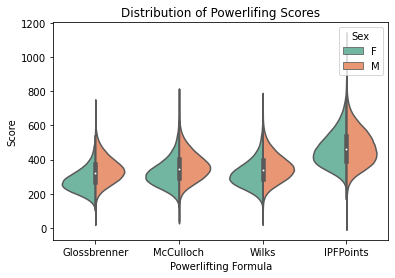

In [210]:
# plot formula score distribution, sex
sns.violinplot(data=formulas, x="variable", y="value", hue='Sex', split=True, palette = "Set2")

# set labels and title
plt.xlabel("Powerlifting Formula")
plt.ylabel("Score")
plt.title("Distribution of Powerlifing Scores")

In [155]:
def top(last_df, sex,index,measure):
    if sex == "F" or sex =="M":
        gen = last_df[last_df['Sex'] == sex]
    else:
        gen = last_df
    toprank = gen.sort_values(measure, ascending =False).iloc[:index,:]
    toprank = toprank.reset_index().drop(columns="index")
    return toprank

### Top 5 Competitor Tables, separated by gender
#### Plot Analysis:
When considering bodyweight to total kg lifted by each athlete, if we consider the top lifter the one who lifts the heaviest weight, then top 5 men lifted between 764% and 1042% of their bodyweight, whereas the top women lifted between 600% and 794% of their total bodyweight. As a feminist, I hate these stats. 

In [156]:
m5 = top(last_df,"M",5,"TotalKg")
m5

Name  Entries Sex   Age  BodyweightKg  TotalKg  IPFPoints  \
0           Dave Hoff       34   M  28.5        129.27  1344.90     844.07   
1  Donnie Thompson #1        8   M  43.0        169.90  1292.74     722.02   
2   Vladislav Alhazov        7   M  30.0        152.70  1272.32     743.89   
3       Jake Anderson        2   M  30.0        142.61  1270.06     765.11   
4       Shane Hammock        5   M  30.0        143.74  1270.06     762.45   

  Place       Date  
0     1 2016-12-17  
1     1 2008-01-19  
2     2 2008-01-19  
3     1 2013-08-17  
4     2 2013-08-17

In [157]:
w5 = top(last_df,"F",5,"TotalKg")
w5

Name  Entries Sex   Age  BodyweightKg  TotalKg  IPFPoints Place  \
0   Becca Swanson        8   F  29.5        103.50    818.0     824.11     1   
1    April Mathis        5   F  31.0        119.70    790.0     761.31     2   
2  Galina Karpova       32   F  36.5        122.50    735.0     710.88     1   
3  Tatyana Grigor        6   F  41.5        114.60    710.0     705.52     1   
4  Rae-Ann Miller        5   F  41.0        100.52    707.6     735.34     1   

        Date  
0 2003-11-26  
1 2018-11-11  
2 2005-05-26  
3 2012-05-23  
4 2017-08-05

### Top Competitors by IPF Points
#### Plot Analysis:
IPF (International Powerlifting Federation) points are used to rank athletes in competition more fairly when determining "best overall" lifter in competition. In most competitions, athletes compete in specific gender, age and weight classes, where they are only competing against those in their same classes. By using IPF points, which takes bodyweight metrics, age and gender into consideration, athletes are able to compete together more fairly for the "best overall" award (though these awards are typically still separated by gender). When we look at the top 5 competitors gauged by IPF points, we can see that the top 5 competitors are women, who lift between 799% and 969% of their bodyweight. 

In [158]:
top10IPF = top(last_df,"na",5,"IPFPoints")
top10IPF

Name  Entries Sex   Age  BodyweightKg  TotalKg  IPFPoints Place  \
0      Stacy Burr       16   F  27.0         67.04    630.0    1068.52     1   
1      Eva Dunbar        8   F  36.0         66.95    621.5    1054.68     1   
2  Stefanie Cohen       11   F  26.0         58.80    562.5    1021.43     1   
3  Chakera Ingram       11   F  22.0         84.90    671.0    1016.03     1   
4   Chleo Van Wyk        9   F  26.0         88.00    650.0     968.97     1   

        Date  
0 2018-11-03  
1 2018-03-10  
2 2019-03-15  
3 2018-01-06  
4 2017-03-18

This finds the first male listed when ranked by IPF points alone at place 13. 

In [159]:
new = last_df.sort_values("IPFPoints", ascending =False)
new= new.reset_index().drop(columns = "index")
pos = new.Sex.ne('F').idxmax() #finds first instance where sex !- F
new.iloc[[pos]]

Name  Entries Sex   Age  BodyweightKg  TotalKg  IPFPoints  \
13  Zahir Khudayarov       11   M  32.0         125.0   1112.5     928.07   

   Place       Date  
13     1 2015-09-26

### Categorical Distributions
#### Plot Analysis:
These plots show the counts of categorical data throughout the dataset. From top left, we have the total number of male and female athletes in the dataset. Then we have the number of people who chose to use equipment during competition and what kind they used. Next, the age distributions across competitions. Finally, the next 3 rows are dedicated to success and fails of the 3 attempted lifts throughout competition. We can clearly see that the 3rd attempt for all lifts has the highest failure rates, which makes sense as athletes probably get tired during their lifts. 

In [160]:
cleaned_df

Sex   Equipment   Age  BodyweightKg Squat1Kg Squat2Kg Squat3Kg  \
0        M  Single-ply  23.5         74.00  Success  Success     Fail   
1        F         Raw  16.5         71.10  Success  Success     Fail   
6        M  Single-ply  16.5         81.70  Success  Success  Success   
18       M  Single-ply  65.5         59.90  Success  Success  Success   
19       M  Single-ply  69.5         59.05     Fail  Success  Success   
...     ..         ...   ...           ...      ...      ...      ...   
985415   M         Raw  20.5         73.70  Success  Success     Fail   
985417   M  Single-ply  47.0        103.00  Success  Success  Success   
985418   M         Raw  19.5         62.35  Success  Success  Success   
985419   M         Raw  20.5         80.25  Success  Success  Success   
985420   F         Raw  38.5         60.70  Success  Success  Success   

       Bench1Kg Bench2Kg Bench3Kg Deadlift1Kg Deadlift2Kg Deadlift3Kg  \
0       Success     Fail  Success     Success     Success     Success   
1       Success  Success  Success     Success     Success     Success   
6       Success  Success     Fail     Success     Success     Success   
18      Success  Success     Fail     Success     Success     Success   
19         Fail  Success     Fail     Success     Success     Success   
...         ...      ...      ...         ...         ...         ...   
985415  Success     Fail  Success     Success     Success        Fail   
985417  Success  Success     Fail     Success     Success        Fail   
985418  Success     Fail     Fail     Success     Success        Fail   
985419  Success  Success  Success     Success     Success     Success   
985420  Success  Success     Fail     Success     Success        Fail   

        TotalKg  Place  
0         435.0    7.0  
1         300.0    1.0  
6         485.0    3.0  
18        260.0    2.0  
19        235.0    2.0  
...         ...    ...  
985415    625.0    2.0  
985417    585.0    1.0  
985418    385.0   11.0  
985419    530.0    7.0  
985420    270.0    3.0  

[78557 rows x 15 columns]

In [161]:
ordered = cleaned_df[["Squat1Kg","Squat2Kg","Squat3Kg","Bench1Kg","Bench2Kg","Bench3Kg",
                       "Deadlift1Kg","Deadlift2Kg","Deadlift3Kg"]]

sq1= ordered.sort_values(by="Squat1Kg").reset_index()
sq2 = ordered.sort_values(by="Squat2Kg").reset_index()
sq3 = ordered.sort_values(by="Squat3Kg").reset_index()
sq4 = ordered.sort_values(by="Bench1Kg").reset_index()
sq5 = ordered.sort_values(by="Bench2Kg").reset_index()
sq6 = ordered.sort_values(by="Bench3Kg").reset_index()
sq7 = ordered.sort_values(by="Deadlift1Kg").reset_index()
sq8 = ordered.sort_values(by="Deadlift2Kg").reset_index()
sq9 = ordered.sort_values(by="Deadlift3Kg").reset_index()


ordered = {"Squat1Kg":sq1["Squat1Kg"],"Squat2Kg":sq2["Squat2Kg"],"Squat3Kg":sq3["Squat3Kg"],
           "Bench1Kg":sq4["Bench1Kg"],"Bench2Kg":sq5["Bench2Kg"],"Bench3Kg":sq6["Bench3Kg"],
           "Deadlift1Kg":sq7["Deadlift1Kg"],"Deadlift2Kg":sq8["Deadlift2Kg"],"Deadlift3Kg":sq9["Deadlift3Kg"]}

lifts_sorted = pd.DataFrame(data=ordered)



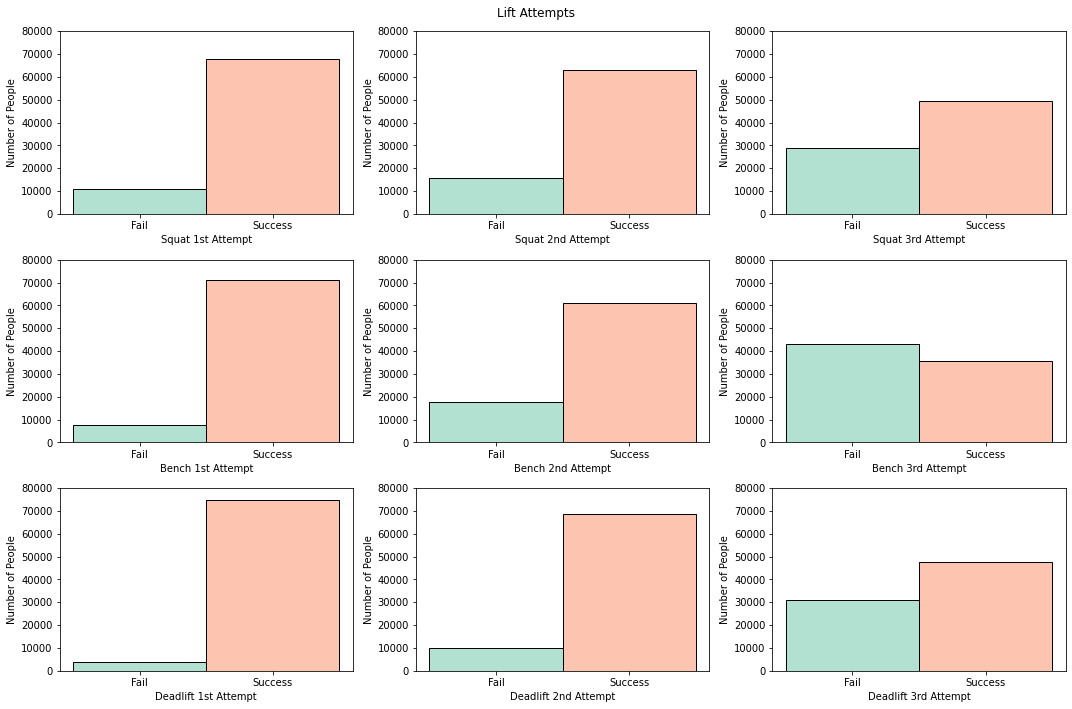

In [162]:
fig, axes = plt.subplots(3,3)
fig.set_figwidth(15)
fig.set_figheight(10)

def graph_sbd_lifts (column,axis1,axis2,attempt):
    graph = sns.histplot(data=lifts_sorted, x=column, ax=axes[axis1][axis2], hue = column,palette = "Set2", legend=False)
    graph.set_ylim(bottom=0, top=80000);
    graph.set_ylabel("Number of People")
    graph.set_xlabel(attempt)


graph_sbd_lifts("Squat1Kg",0,0,"Squat 1st Attempt")
graph_sbd_lifts("Squat2Kg",0,1,"Squat 2nd Attempt")
graph_sbd_lifts("Squat3Kg",0,2,"Squat 3rd Attempt")

graph_sbd_lifts("Bench1Kg",1,0,"Bench 1st Attempt")
graph_sbd_lifts("Bench2Kg",1,1,"Bench 2nd Attempt")
graph_sbd_lifts("Bench3Kg",1,2,"Bench 3rd Attempt")

graph_sbd_lifts("Deadlift1Kg",2,0,"Deadlift 1st Attempt")
graph_sbd_lifts("Deadlift2Kg",2,1,"Deadlift 2nd Attempt")
graph_sbd_lifts("Deadlift3Kg",2,2,"Deadlift 3rd Attempt")

fig.suptitle("Lift Attempts")

plt.tight_layout()

### Major Meets SBD box plots
We wanted to see the differences between major powerlifting meets by looking at age, bodyweight, best lifts across SBD (Squat/Bench/Deadlift), and the total kg lifted at each meet. For age distributions, we see lower age ranges in the Collegiate Nationals and higher age ranges in the Masters Championships, which is expected. For weight distributions, we also see lower bodyweight averages at the Collegiate Nationals, it would be interesting to look at gender distributions as well. The Nationals, European and World Championships appear to be very comparable when looking across SBD lifts.    

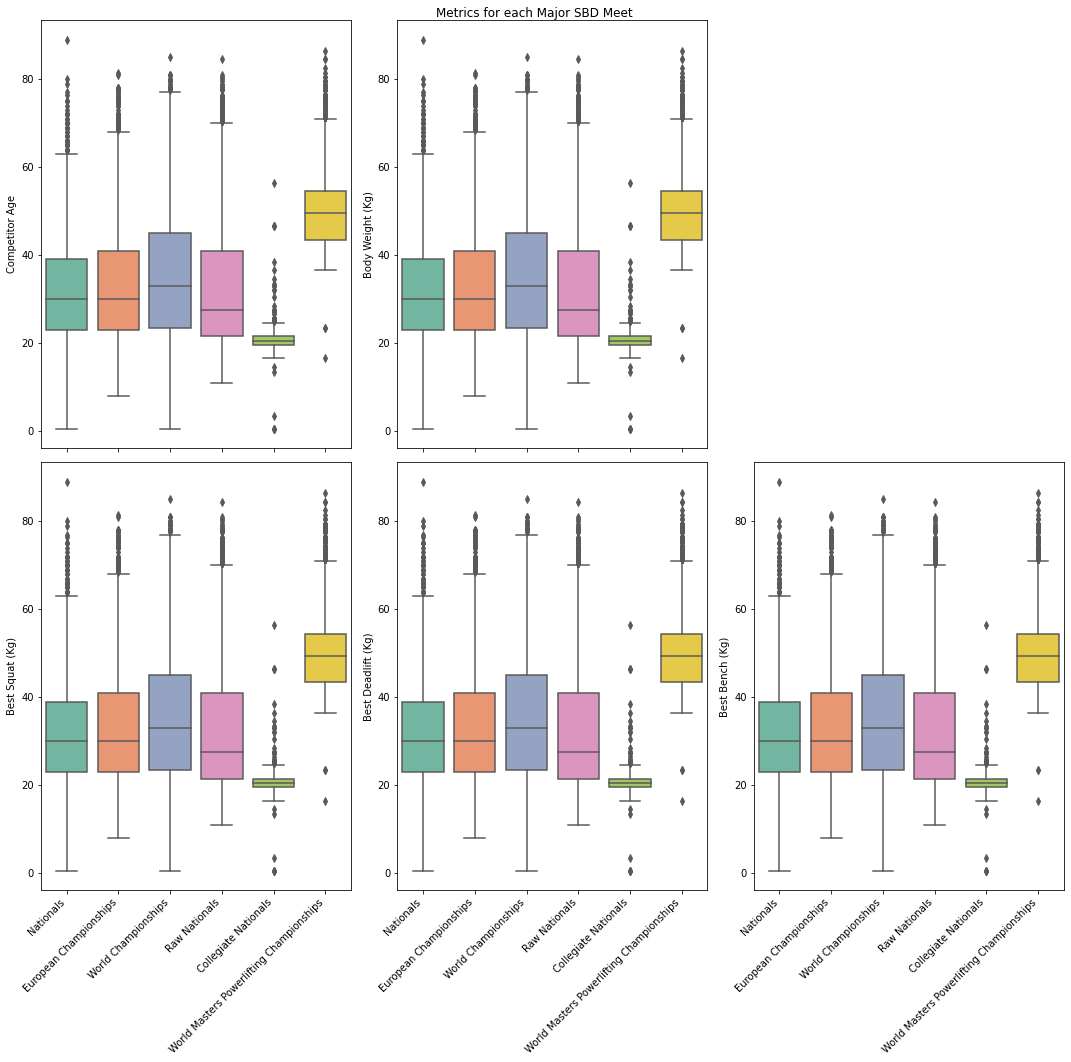

In [163]:
fig, axes = plt.subplots(2,3)
fig.set_figwidth(15)
fig.set_figheight(15)
fig.autofmt_xdate(rotation= 45)

meets = df["MeetName"].value_counts()
firstPlace = df[df.MeetName.isin(meets.index[meets.gt(5000)])]
firstPlace = firstPlace[firstPlace.Best3DeadliftKg > 0]
firstPlace = firstPlace[firstPlace.Best3BenchKg > 0]
firstPlace = firstPlace[firstPlace.Best3SquatKg > 0]
firstPlace.dropna().reset_index()

cols = ["Age", "BodyweightKg", "Best3SquatKg", "Best3DeadliftKg", "Best3BenchKg", "TotalKg"]
y = ["Competitor Age","Body Weight (Kg)","Best Squat (Kg)","Best Deadlift (Kg)","Best Bench (Kg)","Total (Kg)"]

def graph_sbd_lifts (column,axis1,axis2,i):
    meets_g = sns.boxplot(data=firstPlace, x="MeetName", y=cols[0],ax=axes[axis1][axis2],palette = "Set2")
    meets_g.set_xlabel("")
    meets_g.set_ylabel(y[i])


graph_sbd_lifts(cols[0],0,0,0)
graph_sbd_lifts(cols[1],0,1,1)
graph_sbd_lifts(cols[2],1,0,2)
graph_sbd_lifts(cols[3],1,1,3)
graph_sbd_lifts(cols[4],1,2,4)

ax6 = axes[0,2].axis('off')

fig.suptitle("Metrics for each Major SBD Meet")
plt.tight_layout()

### Predictive Analysis

#### Data Cleaning for ML
We encoded all categorical data to 0, 1 or 2, allowing us to use categorical data in ML. We are working to predict total weight lifted by using the participants' gender, equipment, age, place received in competition, competitor bodyweight, and if they were or were not successful on their 3 SBD attempts. 

In [164]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

sbd = cleaned_df.copy()

enc = LabelEncoder()
encoded = enc.fit_transform(sbd["Equipment"])
sbd["Equipment"] = encoded
encoded1 = enc.fit_transform(sbd["Sex"])
sbd["Sex"] = encoded1

for col in attemptCols:
    encoded2 = enc.fit_transform(sbd[col])
    sbd[col] = encoded2
sbd

Sex  Equipment   Age  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg  \
0         1          2  23.5         74.00         1         1         0   
1         0          1  16.5         71.10         1         1         0   
6         1          2  16.5         81.70         1         1         1   
18        1          2  65.5         59.90         1         1         1   
19        1          2  69.5         59.05         0         1         1   
...     ...        ...   ...           ...       ...       ...       ...   
985415    1          1  20.5         73.70         1         1         0   
985417    1          2  47.0        103.00         1         1         1   
985418    1          1  19.5         62.35         1         1         1   
985419    1          1  20.5         80.25         1         1         1   
985420    0          1  38.5         60.70         1         1         1   

        Bench1Kg  Bench2Kg  Bench3Kg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  \
0              1         0         1            1            1            1   
1              1         1         1            1            1            1   
6              1         1         0            1            1            1   
18             1         1         0            1            1            1   
19             0         1         0            1            1            1   
...          ...       ...       ...          ...          ...          ...   
985415         1         0         1            1            1            0   
985417         1         1         0            1            1            0   
985418         1         0         0            1            1            0   
985419         1         1         1            1            1            1   
985420         1         1         0            1            1            0   

        TotalKg  Place  
0         435.0    7.0  
1         300.0    1.0  
6         485.0    3.0  
18        260.0    2.0  
19        235.0    2.0  
...         ...    ...  
985415    625.0    2.0  
985417    585.0    1.0  
985418    385.0   11.0  
985419    530.0    7.0  
985420    270.0    3.0  

[78557 rows x 15 columns]

#### Baseline 
Percent = the mean of total kg lifted / bodyweight kg across all competitors 
<br>Baseline estimate = competitors bodyweight * percent 	

In [165]:
# sbd["Baseline Estimate"] = (((sbd["TotalKg"] / sbd["BodyweightKg"])).mean() * sbd["BodyweightKg"])
sbd["Baseline Estimate"] = (7 * sbd["BodyweightKg"])

sbd

Sex  Equipment   Age  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg  \
0         1          2  23.5         74.00         1         1         0   
1         0          1  16.5         71.10         1         1         0   
6         1          2  16.5         81.70         1         1         1   
18        1          2  65.5         59.90         1         1         1   
19        1          2  69.5         59.05         0         1         1   
...     ...        ...   ...           ...       ...       ...       ...   
985415    1          1  20.5         73.70         1         1         0   
985417    1          2  47.0        103.00         1         1         1   
985418    1          1  19.5         62.35         1         1         1   
985419    1          1  20.5         80.25         1         1         1   
985420    0          1  38.5         60.70         1         1         1   

        Bench1Kg  Bench2Kg  Bench3Kg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  \
0              1         0         1            1            1            1   
1              1         1         1            1            1            1   
6              1         1         0            1            1            1   
18             1         1         0            1            1            1   
19             0         1         0            1            1            1   
...          ...       ...       ...          ...          ...          ...   
985415         1         0         1            1            1            0   
985417         1         1         0            1            1            0   
985418         1         0         0            1            1            0   
985419         1         1         1            1            1            1   
985420         1         1         0            1            1            0   

        TotalKg  Place  Baseline Estimate  
0         435.0    7.0             518.00  
1         300.0    1.0             497.70  
6         485.0    3.0             571.90  
18        260.0    2.0             419.30  
19        235.0    2.0             413.35  
...         ...    ...                ...  
985415    625.0    2.0             515.90  
985417    585.0    1.0             721.00  
985418    385.0   11.0             436.45  
985419    530.0    7.0             561.75  
985420    270.0    3.0             424.90  

[78557 rows x 16 columns]

#### Model Set Up

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.stats import variation

In [171]:
# split data
X = sbd.drop(columns = ["TotalKg"])
y = sbd["TotalKg"]
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.75, random_state=25)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=25)

In [172]:
# scale data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(test_scaled, columns=X_test.columns)

In [173]:
# remove baseline data from training and test set

baseline_train = X_train["Baseline Estimate"]
X_train = X_train.drop(columns = "Baseline Estimate")

baseline_test = X_test["Baseline Estimate"]
X_test = X_test.drop(columns = "Baseline Estimate")



#### Baseline evaluation metrics

In [174]:
# baseline metrics

print('mean absolute percentage error for training set:', mean_absolute_percentage_error(y_train, baseline_train))
print('mean absolute error for training set:', mean_absolute_error(y_train, baseline_train))
print('mean square error for training set:', mean_squared_error(y_train, baseline_train))
print('root mean square error for training set:', mean_squared_error(y_train, baseline_train, squared=False))
print("coefficient of variation for training set:", (np.std(baseline_train) / np.mean(baseline_train)))


mean absolute percentage error for training set: 1.0006368343691587
mean absolute error for training set: 464.5859054262777
mean square error for training set: 242947.21020062233
root mean square error for training set: 492.89675409828203
coefficient of variation for training set: 1780891452197349.5


#### Evaluation Environment

K-fold cross evaluation environment 

The evaluateSplit() function receives a classifier, input features, and target features. It returns a plethora of metrics using `sklean`'s cross_val_score() function. The scoring parameter specifies how the given k-fold evaluation is evaluated.

In [175]:
def evaluateSplit(classifier, x, y):
    model = classifier
    perc_abs_scores = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_absolute_percentage_error')
    abs_scores = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_absolute_error')
    sq_scores = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error')
    root_sq_scores = cross_val_score(model, x, y, cv = 5, scoring = 'neg_root_mean_squared_error')
    
    model.fit(x, y)
    pred = model.predict(x)
    coef_variation = variation(pred)
    coef_variation = np.std(pred) / np.mean(pred)
    

    print('mean absolute percentage error for training set:', perc_abs_scores.mean() * -1)
    print('mean absolute error for training set:' , abs_scores.mean() * -1)
    print('mean square error for training set:', sq_scores.mean() * -1)
    print('root mean square error for training set:', root_sq_scores.mean() * -1)
    print("coefficient of variation for training set:", coef_variation)

In [176]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, TweedieRegressor, Lasso, ElasticNet, LassoLars, ARDRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

The evaluateSplit() function is called multiple times, each with a different classifier.
    - The following classifiers were evaluated: linear regression, lasso, ridge, elastic net, Tweedie regressor, bayesian ridge, and ARD regression.
    - The classifiers with the best metrics are Linear regression, Ridge, Bayesian Ridge, and ARD regression.

LINEAR REGRESSION \
mean absolute percentage error for training set: 0.18186000123429288 \
mean absolute error for training set: 75.2496784603663 \
mean square error for training set: 9738.747982719602 \
root mean square error for training set: 98.68458729901943 \
coefficient of variation for training set: 0.2854798260821037 

LASSO \
mean absolute percentage error for training set: 0.18196013170657444 \
mean absolute error for training set: 75.28026025748251 \
mean square error for training set: 9750.781259341273 \
root mean square error for training set: 98.74545873145416 \
coefficient of variation for training set: 0.28229596017901104 

RIDGE \
mean absolute percentage error for training set: 0.1818601192782741 \
mean absolute error for training set: 75.24965687006005 \
mean square error for training set: 9738.747918694615 \
root mean square error for training set: 98.68458696316006 \
coefficient of variation for training set: 0.2854765266489344 

ELASTIC NET \
mean absolute percentage error for training set: 0.20231194929321045 \
mean absolute error for training set: 80.8383578967001 \
mean square error for training set: 10911.975405898786 \
root mean square error for training set: 104.45946820920082 \
coefficient of variation for training set: 0.2119479290109918 

TWEEDIE REGRESSOR \
mean absolute percentage error for training set: 0.22673428748495383 \
mean absolute error for training set: 88.57732457568669 \
mean square error for training set: 12619.100780153833 \
root mean square error for training set: 112.33363007219991 \
coefficient of variation for training set: 0.17018689465218606

BAYESIAN RIDGE \
mean absolute percentage error for training set: 0.1818613659607173 \
mean absolute error for training set: 75.24943853153381 \
mean square error for training set: 9738.747742167072 \
root mean square error for training set: 98.68458594915315 \
coefficient of variation for training set: 0.28544228070486855

ARD REGRESSION \
mean absolute percentage error for training set: 0.1818574509663832 \
mean absolute error for training set: 75.25268201832944 \
mean square error for training set: 9739.449662364506 \
root mean square error for training set: 98.68812509458857 \
coefficient of variation for training set: 0.2854432137793323 

#### Hypertuning Parameters
Hyperparameter tuning was done on a couple of the top classifiers (Ridge and Bayesian ridge).
    - The hyper tuning didn't appear to improve the mean absolute error metric.

In [177]:
# classifier
clf = BayesianRidge()

# set range of values for each given parameter
param_grid = {"n_iter": range(1, 300),
             "tol": [1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5],
             "alpha_1":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],
             "alpha_2":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],
             "lambda_1":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],
             "lambda_2":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1]}

In [178]:
grid = RandomizedSearchCV(clf, param_grid, scoring="neg_mean_absolute_error", n_jobs=-1)
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=BayesianRidge(), n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001, 0.01, 0.1, 1.0,
                                                    10.0],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001, 0.01, 0.1, 1.0,
                                                    10.0],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001, 0.01, 0.1,
                                                     1.0, 10.0],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001, 0.01, 0.1,
                                                     1.0, 10.0],
                                        'n_iter': range(1, 300),
            

*****
clf = Ridge()

param_grid = {"alpha": uniform(0,1),
              "solver": ["auto", "svd", "cholesky", "lbfgs", "lsqr", "sparse_cg", "sag", "saga"]}


Score: -75.24963474472649 \
params: {'alpha': 0.21372037212946993, 'solver': 'sag'}

Score: -75.24930742050564 \
params: {'alpha': 0.5380809157058639, 'solver': 'saga'}

Score: -75.24929166368365 \
params: {'alpha': 0.01061966255321023, 'solver': 'sag'}

*****
clf = BayesianRidge()

param_grid = {"n_iter": range(1, 300),
             "tol": [1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5],
             "alpha_1":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],
             "alpha_2":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],
             "lambda_1":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],
             "lambda_2":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1]}

Score: -75.24940505530265 \
params: {'tol': 100.0,
 'n_iter': 9,
 'lambda_2': 1e-05,
 'lambda_1': 1.0,
 'alpha_2': 1e-06,
 'alpha_1': 0.0001}

Score: -75.24910675820801 \
params: {'tol': 100000.0,
 'n_iter': 92,
 'lambda_2': 0.001,
 'lambda_1': 10.0,
 'alpha_2': 1e-06,
 'alpha_1': 0.0001}
 
 
Score: -75.249106759046 \
params: {'tol': 10000.0,
 'n_iter': 190,
 'lambda_2': 0.01,
 'lambda_1': 10.0,
 'alpha_2': 0.1,
 'alpha_1': 1e-06}

#### Polynomial Feature Expansion
To further train the models, we performed a polynomial feature expansion to degree 2 and retested the best models according to the metrics above so ARDRegression, LinearRegression, Lasso, Ridge, and BayesianRidge.

In [179]:
# polynomial feature expansion
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_train = poly.fit_transform(X_train)

In [180]:
evaluateSplit(ARDRegression(), poly_train, y_train)

mean absolute percentage error for training set: 0.17503811287917825
mean absolute error for training set: 72.9868716491184
mean square error for training set: 9279.563410650688
root mean square error for training set: 96.33026965625649
coefficient of variation for training set: 0.28928487754573756


In [181]:
evaluateSplit(LinearRegression(), poly_train, y_train)

mean absolute percentage error for training set: 0.17502025188567077
mean absolute error for training set: 72.99025063092463
mean square error for training set: 9280.028337348993
root mean square error for training set: 96.33273770697913
coefficient of variation for training set: 0.28945735612783197


In [182]:
evaluateSplit(Lasso(), poly_train, y_train)

mean absolute percentage error for training set: 0.17593887425740876
mean absolute error for training set: 73.19360959829487
mean square error for training set: 9313.287979186745
root mean square error for training set: 96.50502722034078
coefficient of variation for training set: 0.285065469341982


In [183]:
evaluateSplit(Ridge(), poly_train, y_train)

mean absolute percentage error for training set: 0.17502382206961511
mean absolute error for training set: 72.9903920737217
mean square error for training set: 9279.99427287332
root mean square error for training set: 96.33256117604552
coefficient of variation for training set: 0.2894584420825337


In [184]:
evaluateSplit(BayesianRidge(), poly_train, y_train)

mean absolute percentage error for training set: 0.1750621705914211
mean absolute error for training set: 72.99419843782063
mean square error for training set: 9279.945480154163
root mean square error for training set: 96.33230793433657
coefficient of variation for training set: 0.28919821865636386


#### Model Selection
In the end, we decided to go with the Ridge() model and the polynomial expansion to degree 2 because it had the best accuracy and better run time. 

#### Final Model Testing

Our model performed nearly as well on the test data as it did on the training set. For the mean absolute percentage error there was a 0.0001 difference and for the coefficient of variation there was a 0.003 difference. 

In [185]:
test_model = Ridge()
test_model.fit(poly_train, y_train)
poly_test = poly.fit_transform(X_test)
test_pred = test_model.predict(poly_test)
print("mean absolute percentage error for test set", mean_absolute_percentage_error(y_test, test_pred))
print("coefficient of  variation for test set", variation(test_pred))

mean absolute percentage error for test set 0.17512560773163963
coefficient of  variation for test set 0.28693329347138674
